## Optimization Homework 1 - Group 2
### Kenwan Cheung, Joan Lee, Chantel Miller, Tony Smaniotto

### 1 - Consider the following maximization problem. 

max $x_{1} + \frac{1}{4}x_{2}$
<br>
$\frac{1}{2}x_{1} + x_{2} \le 1$
<br>
$2x_{1} + x_{2} \le 2$
<br>
$x_{1} >= 0, x_{2} >= 0 $

### A. Guess the solution. Plot the constraints and the objective function. Justify your guess.

We would guess the optimal solution for this problem would be (1,0). Increasing values of x2 would reduce the overall value of the problem. Increasing x1 is possible but might be outside of the polyedron.

In [111]:
using PyPlot

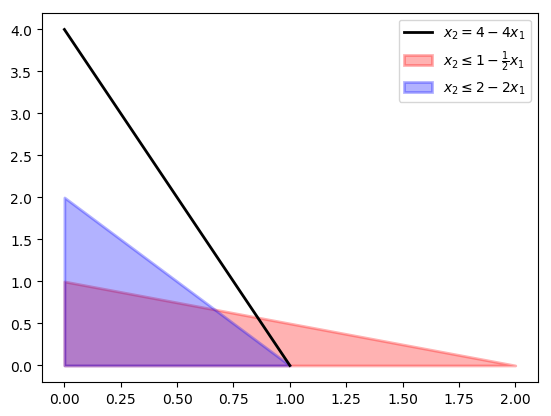

PyObject <matplotlib.legend.Legend object at 0x000000003DFE3A90>

In [112]:
x1 = collect(0:0.1:2)
x2a = 1 - 0.5x1
x2b = ifelse.(2 - 2*x1.>=0, 2-2*x1, NaN)
x2c = ifelse.(4-4x1.>= 0, 4-4x1, NaN)
#x2c = 4-4x1

fig, ax = subplots()
ax[:fill_between](x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = 4-4x_{1}",alpha=1)
ax[:legend](loc="upper right")

### A (cont'd): 

Graphically our guess is validated because of the corners of our polyedron, (1,0) maximizes the objective function and this is the only point where the objective function intersects the polyedron.


### B. Using Julia define and solve the above problem 'as is'.

In [113]:
using JuMP
using GLPKMathProgInterface

In [114]:
# Instantiate linear programming model
myModel = Model(solver=GLPKSolverLP())

# Variable Constraints
@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)

# Model Constraints
@constraint(myModel, 0.5*x1 + x2 <= 1)
@constraint(myModel, 2*x1 + x2 <= 2)

# Objective Function
@objective(myModel, Max, x1 + 0.25*x2)

# Print myModel
myModel

Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

In [115]:
# Solve

@time begin
    status = solve(myModel)
end
println("Objective value: ", getobjectivevalue(myModel))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

  0.000321 seconds (75 allocations: 5.047 KiB)
Objective value: 1.0
x1 = 1.0
x2 = 0.0


The solver confirms our interpretation of the plots along with the guess we initially made of the optimal solution being (1,0). 

### C. Rewrite it in the standard form. 

max $x_{1} + \frac{1}{4}x_{2}$
<br>
$\frac{1}{2}x_{1} + x_{2} + s_{1} = 1$
<br>
$2x_{1} + x_{2} + s_{2} = 2$
<br>
$x_{1} >= 0, x_{2} >= 0 $

### D. Using Julia define and solve the above problem in the standard form.

In [116]:
# Instantiate linear programming model
myModel_std = Model(solver=GLPKSolverLP())

# objective function
c = [1; 0.25; 0; 0]

# constraint values
b = [1;2]

# constraint coefficients
A = [
    0.5 1 1 0;
    2 1 0 1
]

m, n = size(A)

@variable(myModel_std, x[1:n] >= 0)
for i=1:m
    @constraint(myModel_std, sum{A[i,j] * x[j] , j=1:n} == b[i])
end

@objective(myModel_std, Max, sum{c[j] * x[j], j=1:n})
println("The optimization problem to be solved is:")
print(myModel_std)

The optimization problem to be solved is:
Max x[1] + 0.25 x[2]
Subject to
 0.5 x[1] + x[2] + x[3] == 1
 2 x[1] + x[2] + x[4] == 2
 x[i] >= 0 for all i in {1,2,3,4}


In [117]:
# Solve

@time begin
    status = solve(myModel_std)
end
println("Objective value: ", getobjectivevalue(myModel_std))
println("Optimal solution is x = \n", getvalue(x))

  0.000693 seconds (83 allocations: 5.516 KiB)
Objective value: 1.0
Optimal solution is x = 
[1.0, 0.0, 0.5, 0.0]


### E. Compare the solutions in part B and D

The optimal solution for part B was [1,0] while the optimal solution for part D, the same problem but in the standard form, was [1,0.0.5,0]. We see that the x1 and x2 coordinates are the same in both, which should be expected, but the standard form requires a non zero slack variable (x3) to optimize the problem when it is no longer an inequality.

### F. Rework items A and B if the objective function is $x_{1} + x{2}$

_Guess the solution, plot the constraints and the objective function. Justify your guess._

We would guess the optimal solution of this new objective function with the same constraints as before is [0.667, 0.667] as, of the four corners of our polyedron, it is the point that maximizes the objective function. 

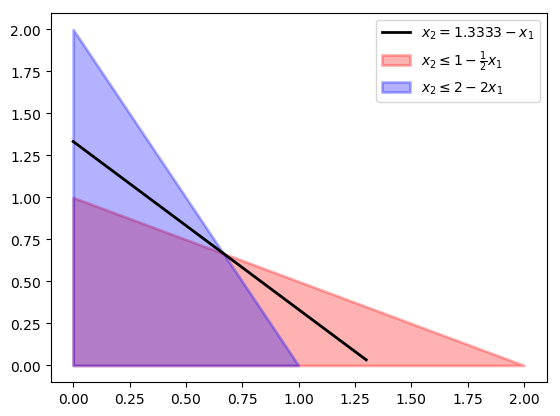

PyObject <matplotlib.legend.Legend object at 0x000000003E23A278>

In [118]:
x1 = collect(0:0.1:2)
x2a = 1 - 0.5x1
x2b = ifelse.(2 - 2*x1.>=0, 2-2*x1, NaN)
x2c = ifelse.(1.3333-x1.>= 0,1.3333-x1, NaN)

fig, ax = subplots()
ax[:fill_between](x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 1 - \frac{1}{2}x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2 - 2x_{1}",alpha=0.3)
ax[:legend](loc="upper right")
ax[:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = 1.3333-x_{1}",alpha=1)
ax[:legend](loc="upper right")

Graphically our guess is validated as [0.667, 0.667] is the only point of intersection for the polyedron and the objective function.

In [119]:
# Instantiate linear programming model
myModel_2 = Model(solver=GLPKSolverLP())

# Variable Constraints
@variable(myModel_2, x1 >= 0)
@variable(myModel_2, x2 >= 0)

# Model Constraints
@constraint(myModel_2, 0.5*x1 + x2 <= 1)
@constraint(myModel_2, 2*x1 + x2 <= 2)

# Objective Function
@objective(myModel_2, Max, x1 + x2)

# Print myModel
myModel_2

Maximization problem with:
 * 2 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

_Solve as is in Julia._

In [120]:
# Solve

@time begin
    status = solve(myModel_2)
end
println("Objective value: ", getobjectivevalue(myModel_2))
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

  0.000380 seconds (75 allocations: 5.047 KiB)
Objective value: 1.3333333333333335
x1 = 0.6666666666666667
x2 = 0.6666666666666666


The optimal solution of our lienar program with the new objective function is [0.667, 0.667] which matches what we guessed and saw graphically.